# **Asking meaningful questions**

**Student**: Pham Le Tu Nhi  
**Student ID**: 21120308

## Questions preview
There are 2 questions I'm interested in answering with the dataset. 
##### **1. What is the state of Data Science in countries around the world?**
- This is a big question to pose (it's very macro and multi-facet), and at first posing the question I didn't know what I was asking specifically. There are 2 part in the quesions that need specification: `state of DS` and `in the world`. 
    - The first part `state of DS`, after much thinking, I've come to conlcude that I want to know the scale and how Data Science is value in each country, along with what the field Data Science is being apply to most in that country. With this knowledge, we can see **which country is leading in the Data based decision making**, **how are they doing that** and **what field to expect most growth in corresponding country**.
    - The second part `in the world` refer to how I would compare countries in the world. The survey is most likely not inclusive of all cases, though I would believe it's a good approximation. Therefore, the `Residential country` is going to be the grouping variable for the analysis. I also went a step further in cataterizing them by their `Continent`, which will hopefully set light on the **distribution of growth between contient**.

- Specific questions (What is):
    - Ratio of people working in company with over 10000 employees
    - Ratio of people working company with less than 50 employees
    - Ratio of people working in companies with more than 20 Data Scientist
    - Ratio of people working in companies with less than 5 Data Scientist
    - Ratio of people who have at least 5 years of programming experience
    - Ratio of people who have at least 5 years of ML experience
    - Ratio of people who work in the field of finance
    - Ratio of people who work in the field of technology
    - Ratio of people who work in the field of biotech/medicine
    - Ratio of people who work in the field of education
    - Ratio of people who make more than 10000 dollar a year
    - Ratio of young (20 - 30 years old) people working in the field

(*) This framework is morrored after the analysis of Kaggle ML & DS survey 2022 analysis competion. Detailed in `What I learned` session.

##### **2. What to do to get a Data Scientist position?**
- This is a rather straight-forward question to pose. With our dataset, I would like to see what the Data Scientist who took the survey study and what technical skills they have to hone to get the job.

- Specific questions:
    - In the Data Scientist who took the survey, what percentage of them have no degree? What percentage of them have a degree (BS, MS, Ph.D)? 
    - In the people who don't have a degree, do they take online courses? What platform do they use?
    - In the people who have a degree, do they take online courses? What platform do they do?
    - In the peopel who have a degree, what percentage of them take online courses?
    - What are the distribution of programming experience level in Data Scientists who took the survey?
    - What are the distribution of ML experience level in Data Scientists who took the survey?
    - What other conclusion (inference) I could make from the answers of the 3 questions above?

##### Programming & dataset preparation

Let's load up our data for analysis.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

#!pip install pycountry_convert
import pycountry_convert as pc

In [3]:
data = pd.read_csv('../Dataset/kaggle_survey_2022_responses_rename.csv', index_col=0, dtype=object)

We also have to do some data correction with name of some countries.

In [4]:
# Rename of countries name
data['Residential country'] = data['Residential country'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom').replace("People 's Republic of China", 'China').replace('Iran, Islamic Republic of...', 'Iran').replace('Hong Kong (S.A.R.)', 'Hong Kong')

# Drop invalid values
invalid_country_value = ((data['Residential country'] == 'I do not wish to disclose my location') | (data['Residential country'] == 'Other'))
data.drop(data[invalid_country_value].index, inplace=True)

# Transform salary data
over_10k = ["10,000-99,999", "15,000-19,999", "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999",
                      "50,000-59,999", "60,000-69,999", "70,000-79,999", "80,000-89,999", "90,000-99,999", "100,000-124,999",
                      "125,000-149,999", "150,000-199,999", "200,000-249,999", "250,000-299,999", "300,000-499,999",
                      "$500,000-999,999", " >$1,000,000"]
data['Current income'] = data['Current income'].apply(lambda x: '> 10,000' if x in over_10k else x)

## What is the state of Data Science around the world?

First, let's check the distribution of survey respondent by country.

In [5]:
total_response_df = data.groupby('Residential country')['Residential country'].agg(number_of_response = 'count').query('number_of_response > 100')
total_response_df = total_response_df.reset_index()

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

continent_color = {
    'North America' : 'brown',
    'South America': 'red', 
    'Asia': 'green',
    'Australia': 'purple',
    'Africa': 'yellow',
    'Europe': 'pink'
}

total_response_df['Continent'] = total_response_df['Residential country'].apply(lambda x: continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(x, cn_name_format='default'))])

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Number of survey taker by country')

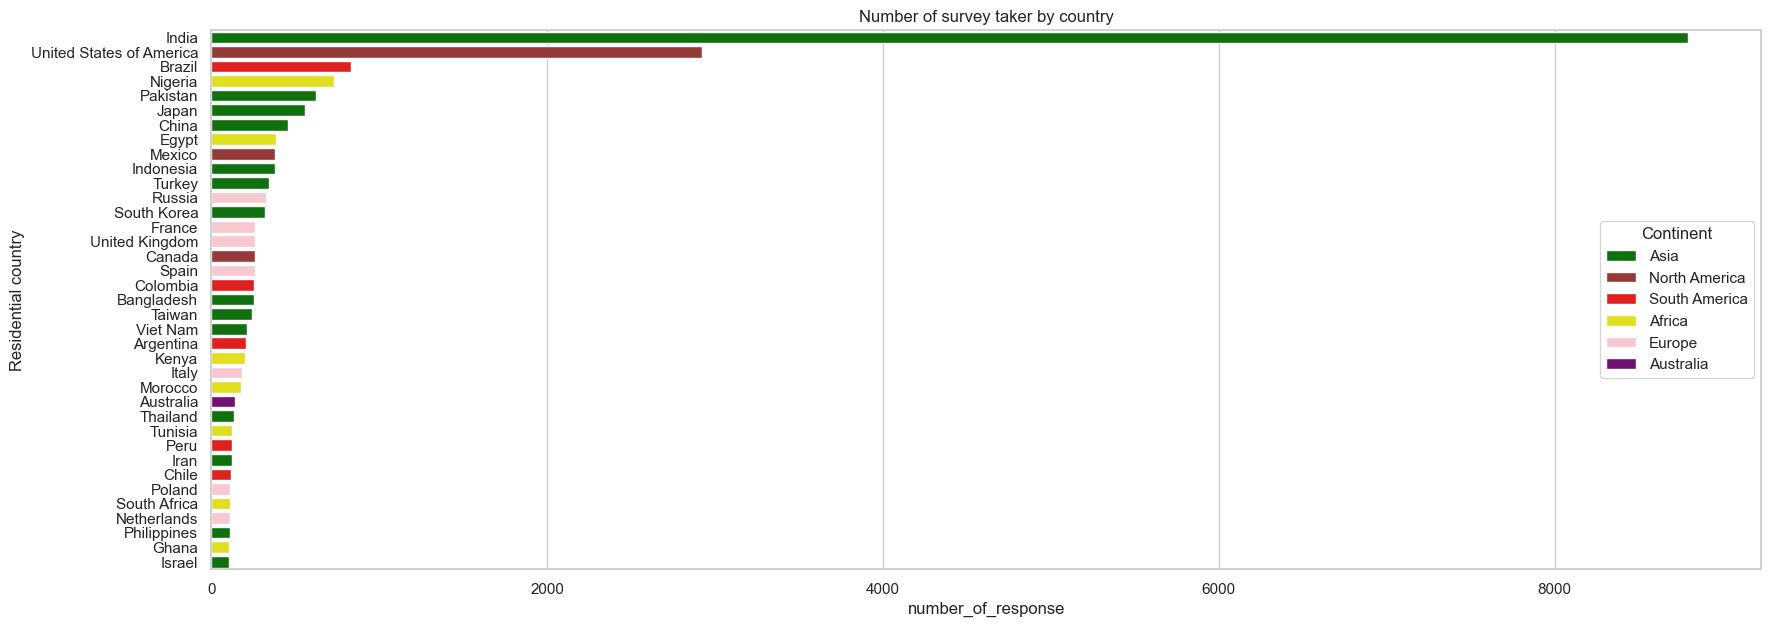

In [17]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')
sns.barplot(x='number_of_response', y='Residential country', data=total_response_df.sort_values(by='number_of_response', ascending=False), palette=continent_color ,hue='Continent', dodge=False)
ax.set_title("Number of survey taker by country")

Looking at the graph, we can see that response from Inida is overwhelmingly large (more than twice as much as the US). Aside from India and the US, other countries seems to be distributed quite uniformly, mixing countries from all Continent. 

Looking closer, we can see that there are only 3 countries from North America, and they are all distributed on the first half of the graph. Another interesting distirbution is with European countries - they are distirbution from the lower first half all the way to the bottom. Asian and African countries seems to be distributed quite even across the graph. And after looking at the graph for sometimes you could notice there is only 1 country from the Australia continent that makes the list is Australia.

Just for better illustration let's see how the Number of survey taker is distributed by number of `Country` in a `Continent`. 

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Number of country in each continent with more than 100 survey response')

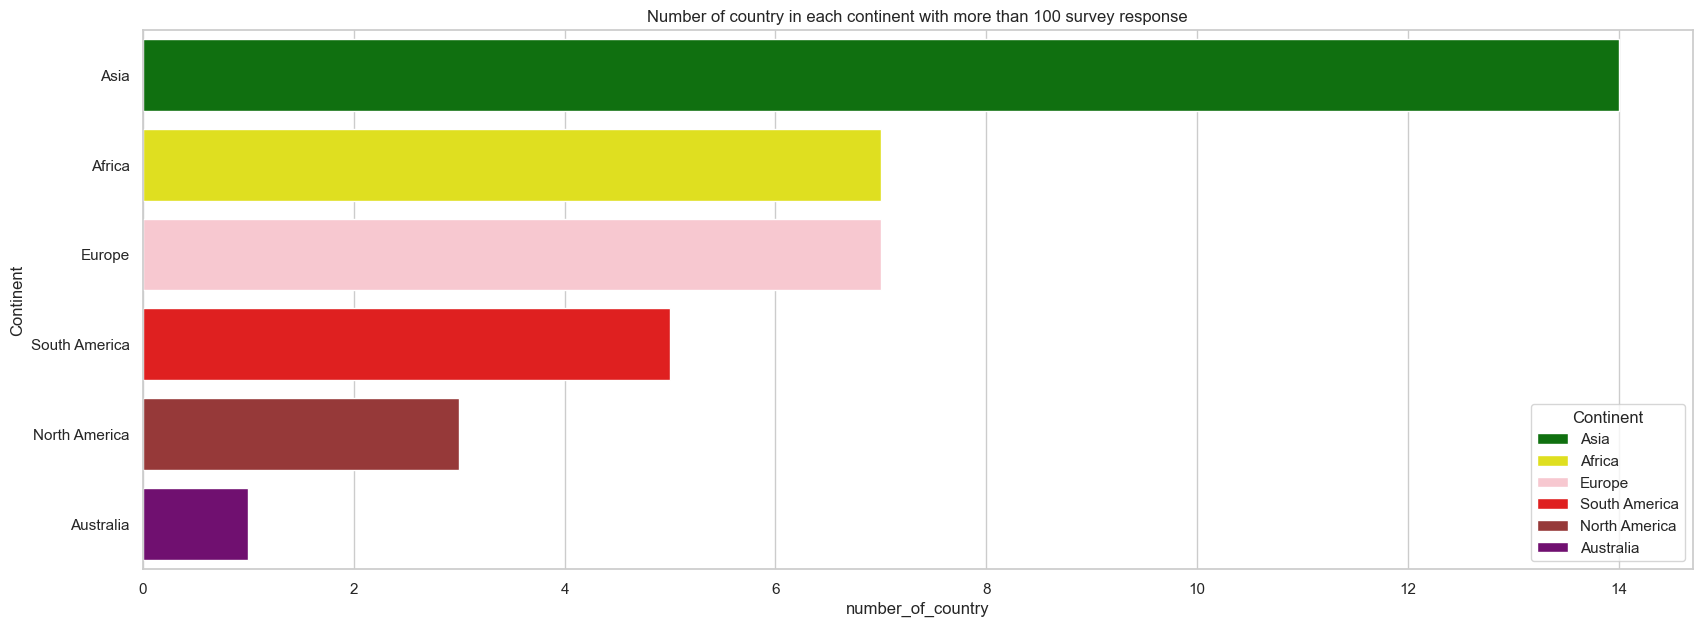

In [32]:
response_by_country_continent = total_response_df.groupby('Continent')['Residential country'].agg(number_of_country='count')
response_by_country_continent = response_by_country_continent.reset_index()

figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')
sns.barplot(x='number_of_country', y='Continent', data=response_by_country_continent.sort_values(by='number_of_country', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Number of country in each continent with more than 100 survey response")

Notice that most of the survey taker are from Asia, follow by Africa countries. Perhaps this can be explain simply by the correlation to number of countries that is in each continent (Asia is the biggest continent). Still, we can still see that Asian countries are more and more engage in Data Science activities - as Asia become more and more wealthy and well educated. The same can be said about Africa countries. 

### Ratio of people working in company with more than 10,000 employees

In [23]:
big_company_df = data[(data['Company size'] == '10,000 or more employees')]
big_company_df = pd.merge(big_company_df.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
big_company_df['ratio'] = big_company_df['big_company'] * 100 / big_company_df['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people working in company with more than 10,000 employees')

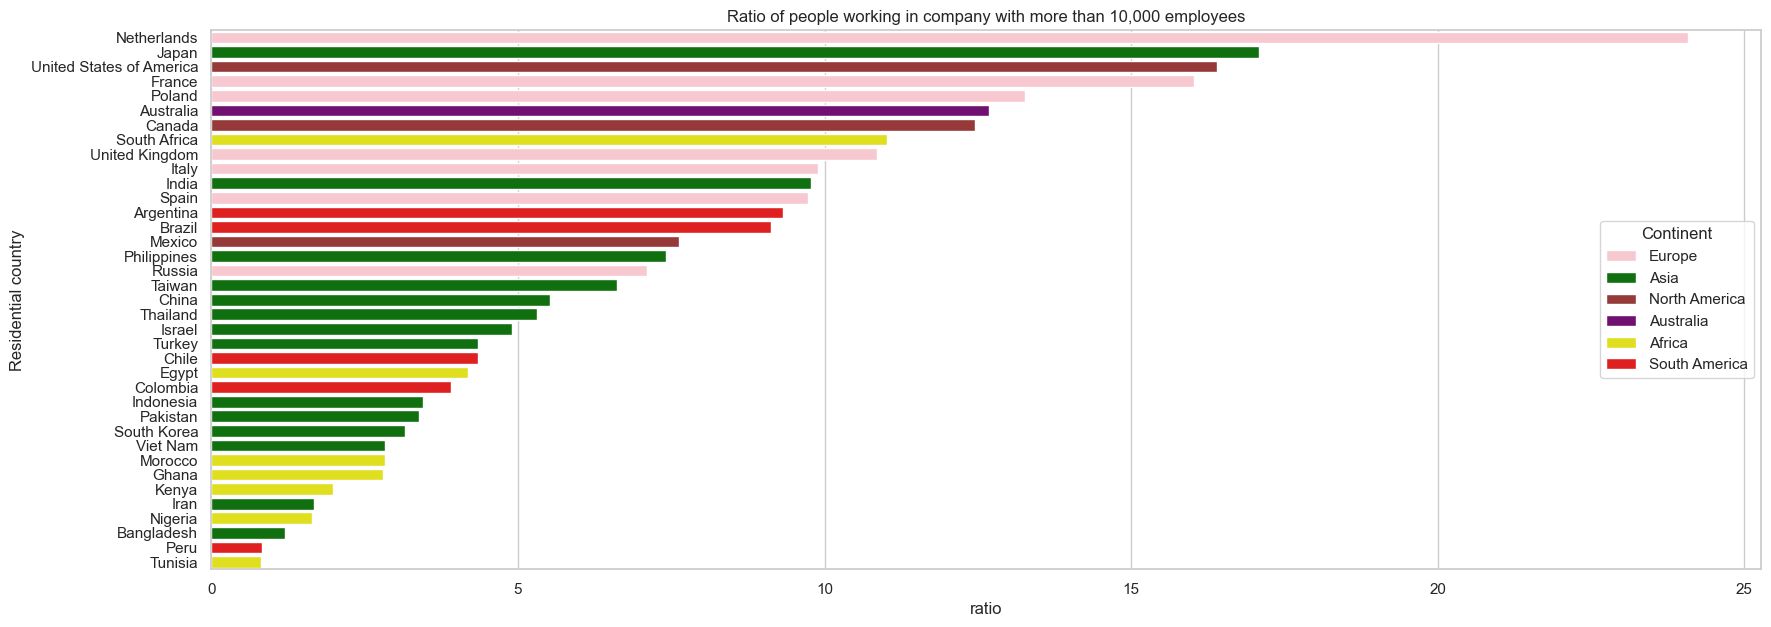

In [33]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ratio', y='Residential country', data=big_company_df.sort_values(by='ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people working in company with more than 10,000 employees")

### Ratio of people working in company with less than 50 employees

In [26]:
small_company_df = data[(data['Company size'] == '0-49 employees')]
small_company_df = pd.merge(small_company_df.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
small_company_df['ratio'] = small_company_df['big_company'] * 100 / small_company_df['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people working in company with less than 50 employees')

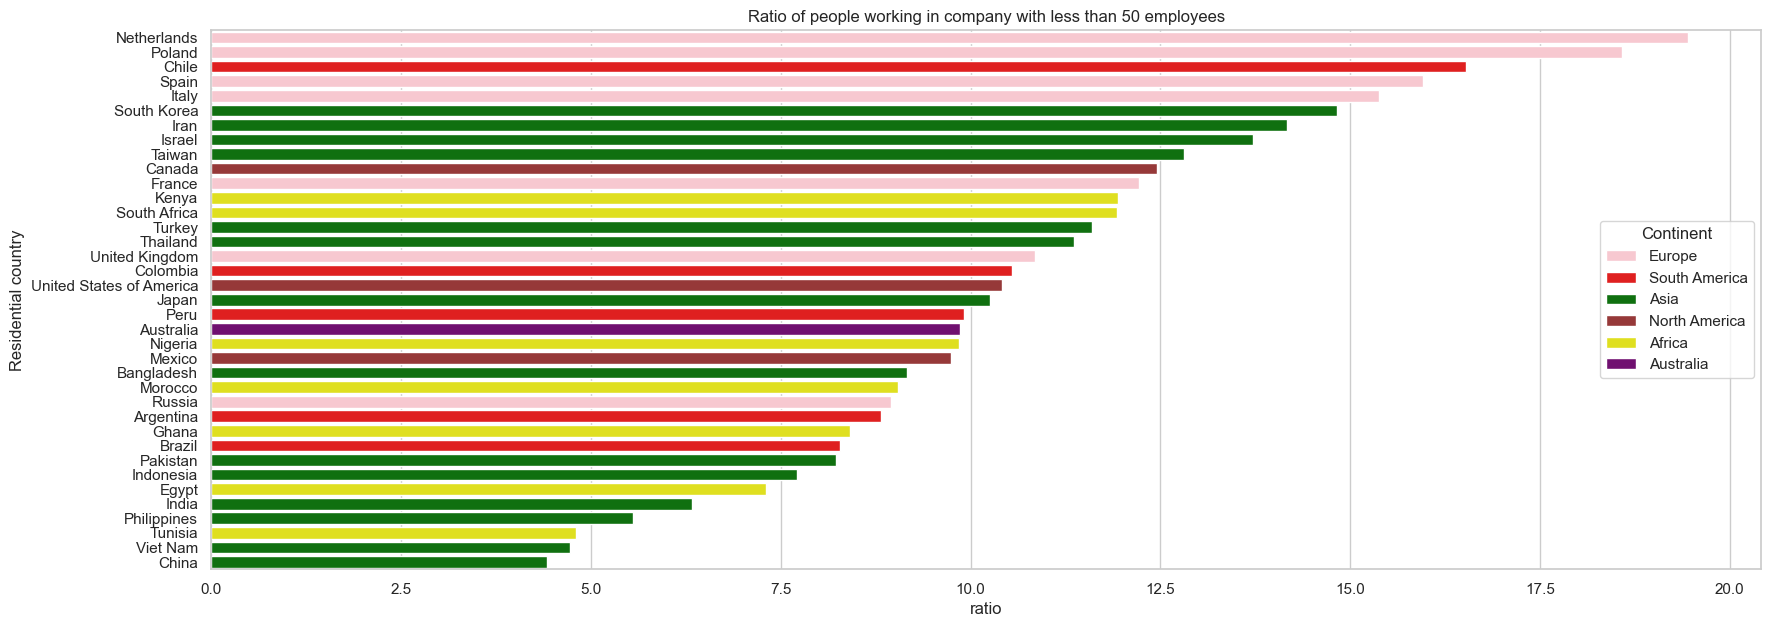

In [34]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ratio', y='Residential country', data=small_company_df.sort_values(by='ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people working in company with less than 50 employees")

### Ratio of people working in companies with more than 20 Data Scientist

In [19]:
company_w20ds_df = data[(data['Individual responsible'] == '20+')]
company_w20ds_df = pd.merge(company_w20ds_df.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
company_w20ds_df['ratio'] = company_w20ds_df['big_company'] * 100 / company_w20ds_df['number_of_response']


c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people working in companies with more than 20 Data Scientist')

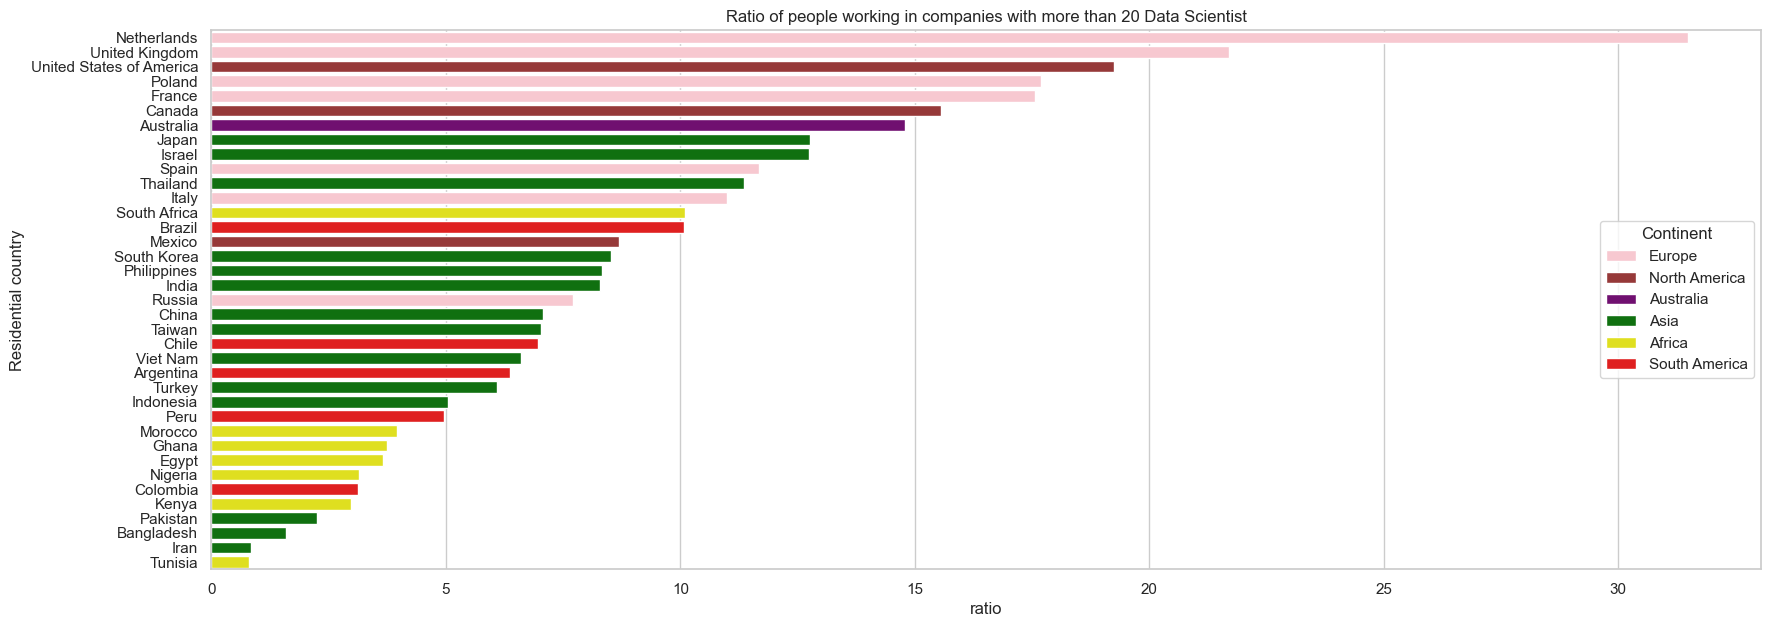

In [29]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ratio', y='Residential country', data=company_w20ds_df.sort_values(by='ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people working in companies with more than 20 Data Scientist")

### Ratio of people working in companies with less than 5 Data Scientist

In [30]:
company_l5ds_df = data[(data['Individual responsible'] == '0') | (data['Individual responsible'] == '1-2') | (data['Individual responsible'] == '3-4')]
company_l5ds_df = pd.merge(company_l5ds_df.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
company_l5ds_df['ratio'] = company_l5ds_df['big_company'] * 100 / company_l5ds_df['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people working in companies with less than 5 Data Scientist')

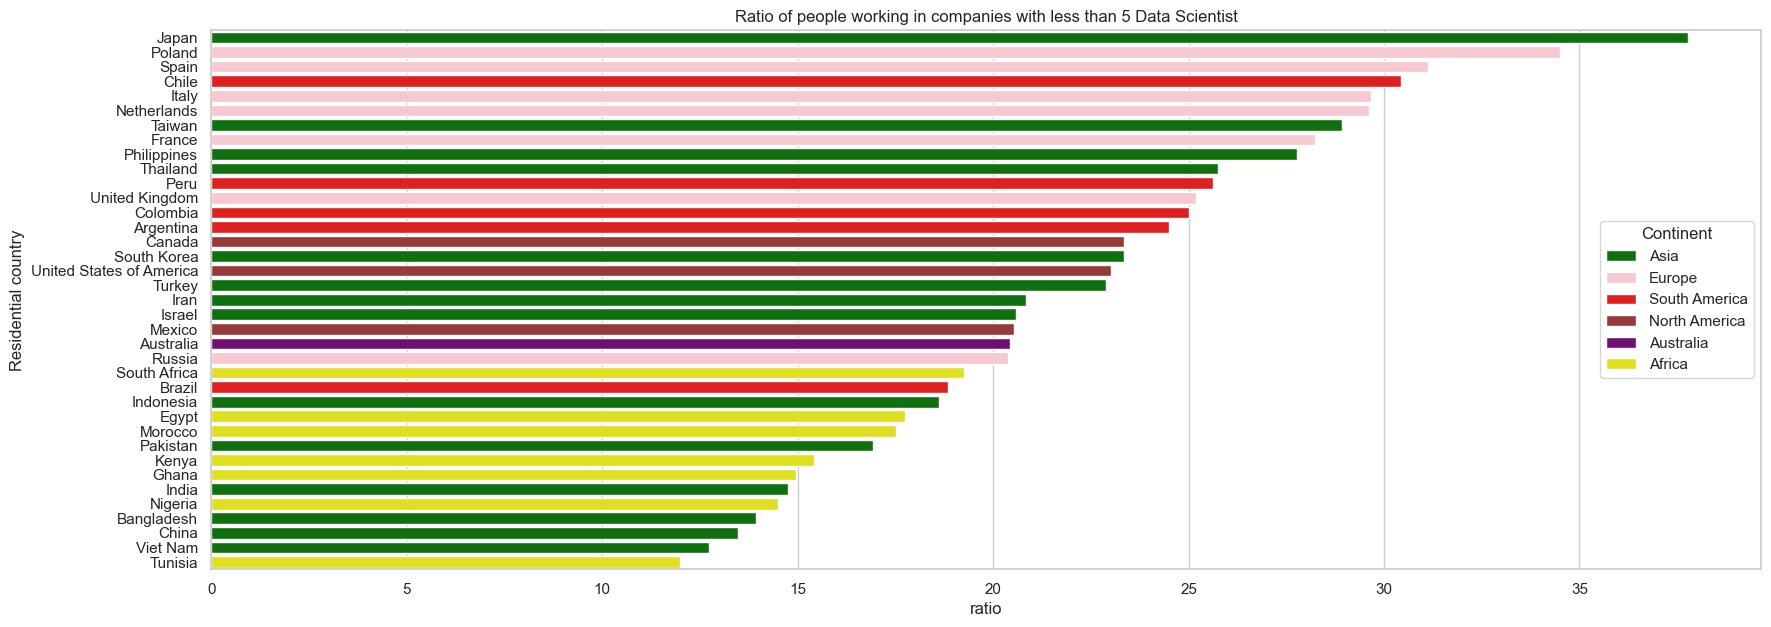

In [35]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ratio', y='Residential country', data=company_l5ds_df.sort_values(by='ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people working in companies with less than 5 Data Scientist")

### Ratio of people who have at least 5 years of programming experience

In [36]:
ppl_w5y_programming_exp = data[(data['Programming experience'] == '5-10 years') | (data['Programming experience'] == '20+ years') | (data['Programming experience'] == '10-20 years')]
ppl_w5y_programming_exp = pd.merge(ppl_w5y_programming_exp.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
ppl_w5y_programming_exp['ratio'] = ppl_w5y_programming_exp['big_company'] * 100 / ppl_w5y_programming_exp['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who have at least 5 years of programming experience')

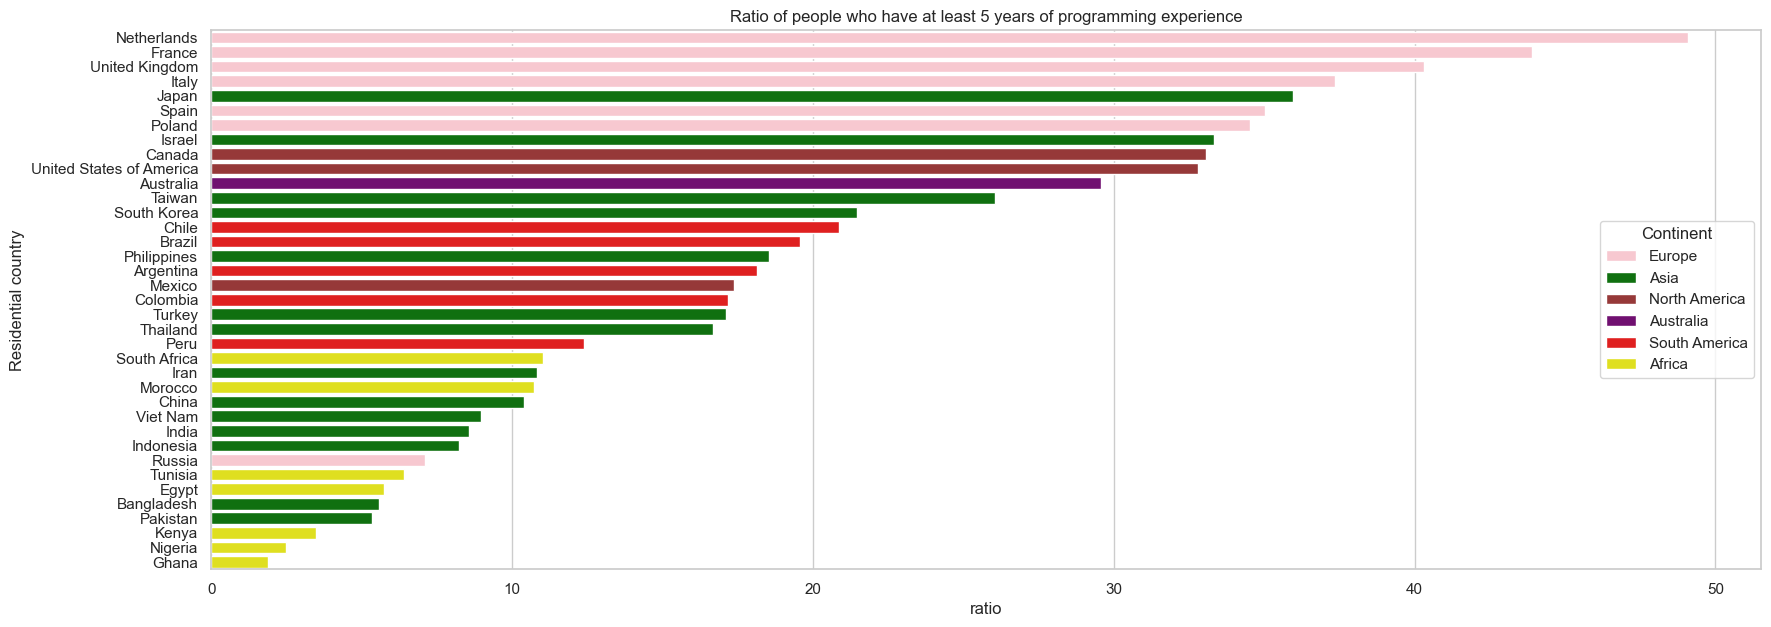

In [38]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ratio', y='Residential country', data=ppl_w5y_programming_exp.sort_values(by='ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who have at least 5 years of programming experience")

### Ratio of people who have at least 5 years of ML experience

In [39]:
ppl_w5y_ml_exp = data[(data['ML experience'] == '5-10 years') | (data['ML experience'] == '20 or more years') | (data['ML experience'] == '10-20 years')]
ppl_w5y_ml_exp = pd.merge(ppl_w5y_ml_exp.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
ppl_w5y_ml_exp['ratio'] = ppl_w5y_ml_exp['big_company'] * 100 / ppl_w5y_ml_exp['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who have at least 5 years of ML experience')

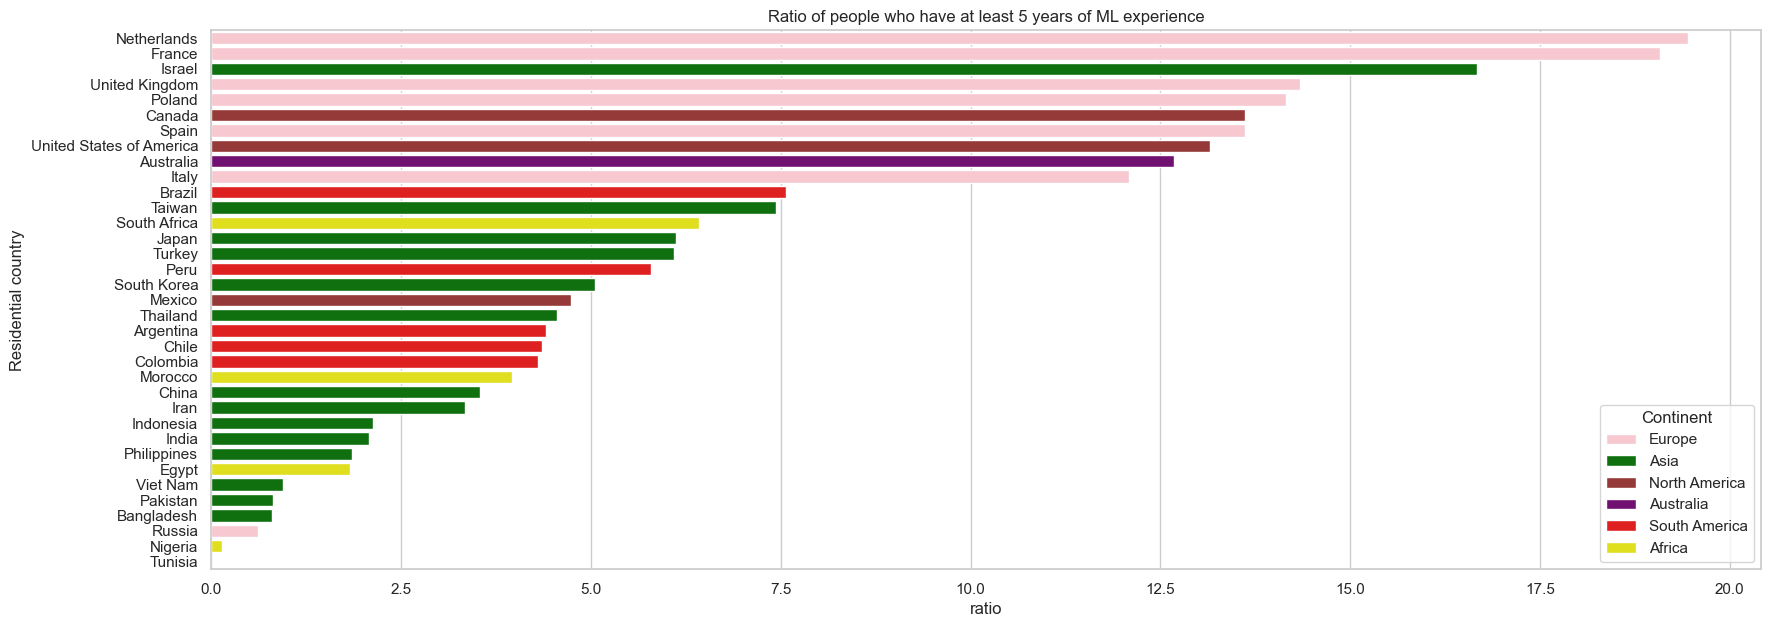

In [41]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ratio', y='Residential country', data=ppl_w5y_ml_exp.sort_values(by='ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who have at least 5 years of ML experience")

### Ratio of people who work in the field of finance

In [101]:
ppl_in_finance_industry = data[(data['Current industry'] == 'Accounting/Finance')]
ppl_in_finance_industry = pd.merge(ppl_in_finance_industry.groupby('Residential country')['Company size'].agg(fin_count = 'count'), total_response_df, on='Residential country')
ppl_in_finance_industry['fin_ratio']= ppl_in_finance_industry['fin_count'] * 100 / ppl_in_finance_industry['number_of_response']

ppl_in_tech_industry = data[(data['Current industry'] == 'Computers/Technology')]
ppl_in_tech_industry = pd.merge(ppl_in_tech_industry.groupby('Residential country')['Company size'].agg(tech_count = 'count'), total_response_df, on='Residential country')
ppl_in_tech_industry['tech_ratio'] = ppl_in_tech_industry['tech_count'] * 100 / ppl_in_tech_industry['number_of_response']

ppl_in_med_industry = data[(data['Current industry'] == 'Medical/Pharmaceutical')]
ppl_in_med_industry = pd.merge(ppl_in_med_industry.groupby('Residential country')['Company size'].agg(med_count = 'count'), total_response_df, on='Residential country')
ppl_in_med_industry['med_ratio']= ppl_in_med_industry['med_count'] * 100 / ppl_in_med_industry['number_of_response']

ppl_in_ed_industry = data[(data['Current industry'] == 'Academics/Education')]
ppl_in_ed_industry = pd.merge(ppl_in_ed_industry.groupby('Residential country')['Company size'].agg(ed_count = 'count'), total_response_df, on='Residential country')
ppl_in_ed_industry['ed_ratio'] = ppl_in_ed_industry['ed_count'] * 100 / ppl_in_ed_industry['number_of_response']

ppl_in_4industry =  pd.merge(ppl_in_finance_industry, ppl_in_tech_industry, on=['Continent', 'Residential country', 'number_of_response'])
ppl_in_4industry =  pd.merge(ppl_in_4industry, ppl_in_med_industry, on=['Continent', 'Residential country', 'number_of_response'])
ppl_in_4industry =  pd.merge(ppl_in_4industry, ppl_in_ed_industry, on=['Continent', 'Residential country', 'number_of_response'])

In [102]:
ppl_in_4industry.set_index('Residential country', inplace=True)
ppl_in_4industry.drop(['number_of_response', 'fin_count', 'med_count', 'ed_count', 'tech_count'], axis=1, inplace=True)

In [103]:
ppl_in_4industry

,Continent,fin_ratio,tech_ratio,med_ratio,ed_ratio
Residential country,,,,,
Argentina,South America,6.862745,2.450980,2.450980,5.392157
Australia,Australia,7.746479,9.859155,2.112676,4.225352
Brazil,South America,3.361345,5.402161,2.280912,7.563025
Canada,North America,6.225681,10.505837,3.112840,5.836576
China,Asia,1.986755,9.271523,2.207506,4.635762
Colombia,South America,2.734375,10.156250,0.781250,5.468750
Egypt,Africa,2.872063,4.699739,1.305483,6.527415
France,Europe,5.725191,11.068702,3.435115,8.778626
Ghana,Africa,5.607477,4.672897,0.934579,1.869159


<Axes: ylabel='Residential country'>

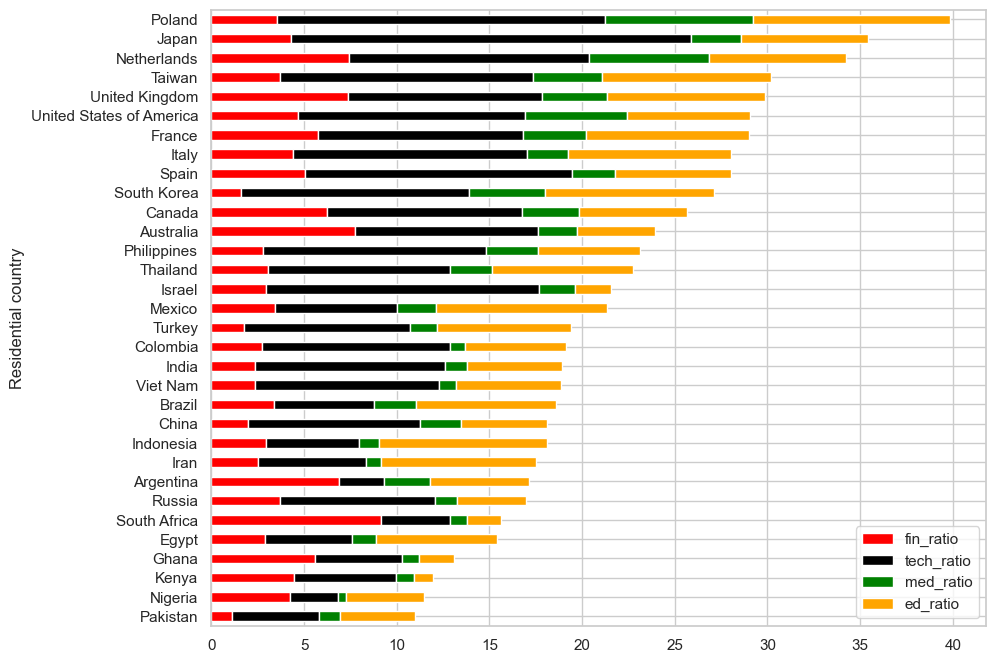

In [110]:
ppl_in_4industry['total_ratio'] = ppl_in_4industry.loc[:, 'fin_ratio':'ed_ratio'].sum(axis=1)
ppl_in_4industry = ppl_in_4industry.sort_values(by='total_ratio')
ppl_in_4industry.loc[:, 'fin_ratio':'ed_ratio'].plot(kind='barh', stacked=True, color=['red', 'black', 'green', 'orange'], figsize=(10, 8))

The chart is quite packed and a bit hard to figure out at first glance. Let's break it down.

First, don't mistake the length of the bar for each country to be the real total ration of the 4 industry in the industry pie of that country. Remember, we are calculating the ratio based on the number of people who complete the survey, which can be a student or a professional. Only people who work are in an industry. Thus, we can treat the length of the bar to be the magnitute of the combine industry, as it's represent the ratio of people who work in the dataset.

Each color corresponse to an industry. 
`To do more analysis and maybe normalize the graph (100%)`

Let's switch gear and compare them by continent.

               fin_ratio  tech_ratio  med_ratio  ed_ratio  total_ratio
Continent                                                             
Africa          0.390604    0.312726   0.067582  0.229088    13.503310
Asia            0.118261    0.489626   0.093422  0.298692    21.696201
Australia       0.323529    0.411765   0.088235  0.176471    23.943662
Europe          0.180601    0.425173   0.131764  0.262461    29.421102
North America   0.188571    0.385477   0.140687  0.285265    25.345940
South America   0.236016    0.328010   0.100413  0.335561    18.301644


<Axes: ylabel='Continent'>

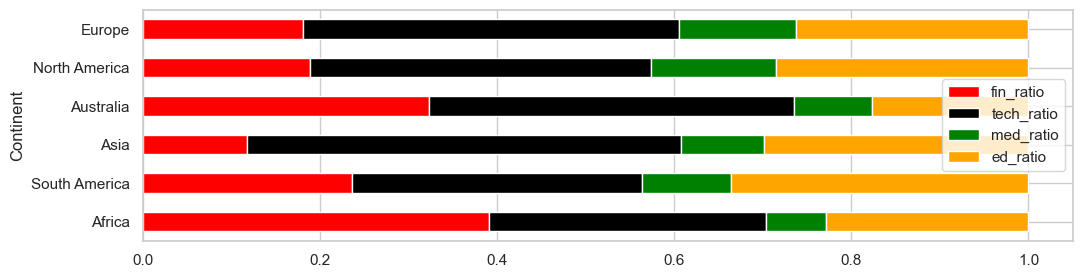

In [120]:
ppl_in_4industry_continent = ppl_in_4industry.groupby('Continent').agg('mean')
ppl_in_4industry_continent['ed_ratio'] /= ppl_in_4industry_continent['total_ratio']
ppl_in_4industry_continent['fin_ratio'] /= ppl_in_4industry_continent['total_ratio']
ppl_in_4industry_continent['tech_ratio'] /= ppl_in_4industry_continent['total_ratio']
ppl_in_4industry_continent['med_ratio'] /= ppl_in_4industry_continent['total_ratio']

print(ppl_in_4industry_continent)
ppl_in_4industry_continent = ppl_in_4industry_continent.sort_values(by='total_ratio')
ppl_in_4industry_continent.loc[:, 'fin_ratio':'ed_ratio'].plot(kind='barh', stacked=True, color=['red', 'black', 'green', 'orange'], figsize=(12, 3))

### Ratio of people who work in the field of technology

In [48]:
ppl_in_tech_industry = data[(data['Current industry'] == 'Computers/Technology')]
ppl_in_tech_industry = pd.merge(ppl_in_tech_industry.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
ppl_in_tech_industry['ratio'] = ppl_in_tech_industry['big_company'] * 100 / ppl_in_tech_industry['number_of_response']

### Ratio of people who work in the field of biotech/medicine

In [49]:
ppl_in_med_industry = data[(data['Current industry'] == 'Medical/Pharmaceutical')]
ppl_in_med_industry = pd.merge(ppl_in_med_industry.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
ppl_in_med_industry['ratio'] = ppl_in_med_industry['big_company'] * 100 / ppl_in_med_industry['number_of_response']

### Ratio of peole who work in the field of education

In [50]:
ppl_in_ed_industry = data[(data['Current industry'] == 'Academics/Education')]
ppl_in_ed_industry = pd.merge(ppl_in_ed_industry.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
ppl_in_ed_industry['ratio'] = ppl_in_ed_industry['big_company'] * 100 / ppl_in_ed_industry['number_of_response']

### Ratio of peole who make more than 10,000 dollars a year

In [45]:
ppl_make_m10k = data[(data['Current income'] == '> 10,000')]
ppl_make_m10k = pd.merge(ppl_make_m10k.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
ppl_make_m10k['ratio'] = ppl_make_m10k['big_company'] * 100 / ppl_make_m10k['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who make more than 10,000 dollars a year')

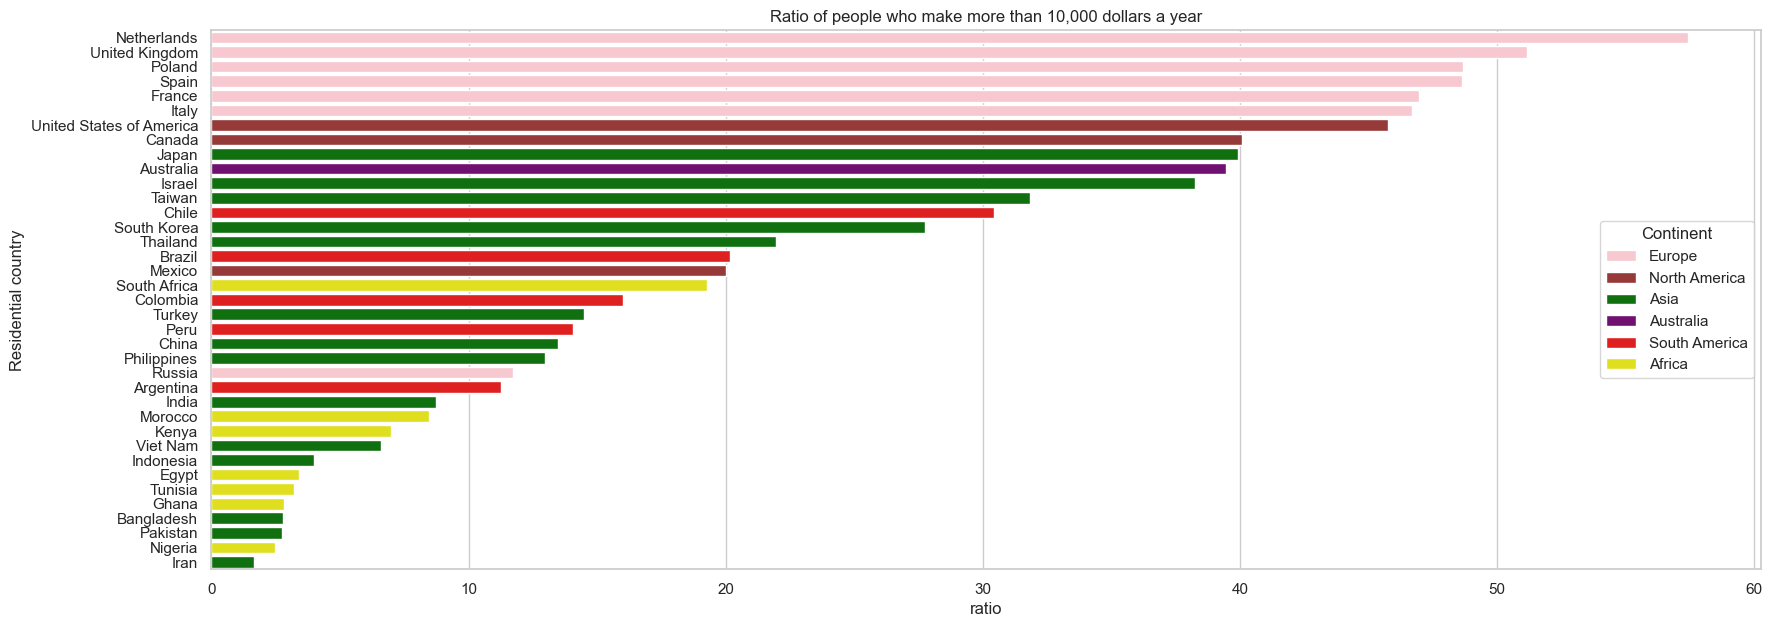

In [47]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ratio', y='Residential country', data=ppl_make_m10k.sort_values(by='ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who make more than 10,000 dollars a year")